# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

Authors:
- Joaquim Marset Alsina
- Jesús Molina Rodríguez de Vera

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
from skimage import color, data, exposure, feature, filters, io, transform 
import pandas as pd

## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

(232, 180) (218, 167)


Text(0.5, 1.0, 'Cross-Correlation Image')

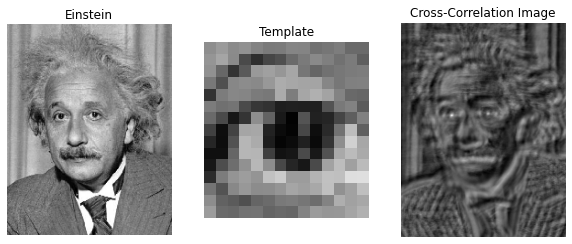

In [ ]:
# solution
drive_path = '/content/drive/MyDrive/CV - Lab/Lab4/images/'
einstein_img = plt.imread(drive_path + 'einstein.png')
template_img = plt.imread(drive_path + 'template.png')

einstein_gray_img = color.rgb2gray(einstein_img)
template_gray_img = color.rgb2gray(template_img)

cross_corelation_img = feature.match_template(einstein_gray_img, template_gray_img)
print(einstein_gray_img.shape, cross_corelation_img.shape)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(10, 10)

for ax in axs:
    ax.axis('off')

axs[0].imshow(einstein_img, cmap = 'gray')
axs[1].imshow(template_img, cmap = 'gray')
axs[2].imshow(cross_corelation_img, cmap = 'gray')   

axs[0].set_title('Einstein')
axs[1].set_title('Template')
axs[2].set_title('Cross-Correlation Image')

*   What is the output of the normalized cross-correlation function?

**Solution**

The cross-correlation function outputs for each pixel of the original image where it can apply the standardized (i.e. subtracting mean and dividing by std) convolution with the template (i.e. starting from that pixel and creating a patch of the image where that pixel is the top-left corner, and the patch is not out of bounds), a value between -1 and 1 indicating the correlation of the template with the patch starting at that image pixel.

As we can see, the dimensions of the resulting images are not the same, and this is because it is not padding the input image to output a correlation value for each pixel. If we apply the `pad_input` parameter, we pad the image, obtain an image with the same size as the input, and the pixel whose correlation value is obtained is assumed to be the center of the patch that matches the template.

A correlation value of 1 will indicate perfect correlation, i.e. perfect matching with the template, whereas a value of -1 will indicate anti-correlation between the patch and the template, i.e. the patch and the template are completely different.

Therefore, we want to take the bigger values of the normalized cross-correlation as those will indicate possible matches with the template. We will need to set some threshold to filter possible false positives and remain only with the real matches.

Below we show the patch corresponding to the biggest correlation value obtained with the template. We can see what we have said about the match being the top-left corner.

Best match correlation: 0.999999911770728


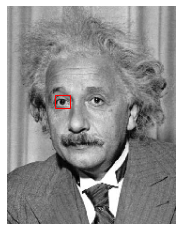

In [ ]:
ij = np.unravel_index(np.argmax(cross_corelation_img), cross_corelation_img.shape)
x, y = ij[::-1]

fig, ax = plt.subplots()

ax.imshow(einstein_gray_img, cmap = 'gray')

width, height = template_gray_img.shape
rect = plt.Rectangle((x, y), width, height, edgecolor='r', facecolor='none')

ax.add_patch(rect)
ax.set_axis_off()

print(f'Best match correlation: {cross_corelation_img[y, x]}')

From now onwards, we will use the `pad_input` option to facilitate the next exercises. Therefore, the matches will correspond to the central pixel of the patch.

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

In [ ]:
# solution
def create_threshold_image(cross_corelation_img, threshold = 0.5):
    return (cross_corelation_img > threshold).astype('uint8')

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

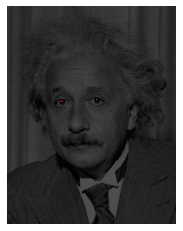

In [ ]:
# solution
cross_corelation_img = feature.match_template(einstein_gray_img, template_gray_img, pad_input=True)
threshold_1_img = create_threshold_image(cross_corelation_img, 0.55)

plt.imshow(einstein_gray_img, cmap = 'gray')
plt.axis('off')

plt.imshow(threshold_1_img, cmap = matplotlib.colors.ListedColormap(['black', 'red']), alpha=0.7)

We have decided to set the threshold value to 0.55 to remove the false positives we could have in other places like the mouth. Setting it to a bigger value than 0.55 will lead to losing the match in the left eye.

We will use the same threshold for the next exercises, and see how the changes in the image and template affect the correlation values and the filtered matches with the template.

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

Text(0.5, 1.0, 'Threshold Image')

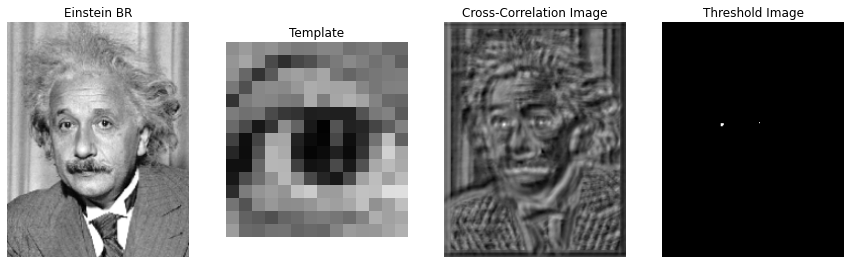

In [ ]:
# solution
einstein_br_img = plt.imread(drive_path + 'einstein_br.png')
einstein_br_gray_img = color.rgb2gray(einstein_br_img)

cross_corelation_img = feature.match_template(einstein_br_gray_img, template_gray_img, pad_input=True)
threshold_2_img = create_threshold_image(cross_corelation_img, 0.55)

fig, axs = plt.subplots(1, 4)
fig.set_size_inches(15, 10)

for ax in axs:
    ax.axis('off')

axs[0].imshow(einstein_br_img)
axs[1].imshow(template_img)
axs[2].imshow(cross_corelation_img, cmap = 'gray')
axs[3].imshow(threshold_2_img, cmap = 'gray')

axs[0].set_title('Einstein BR')
axs[1].set_title('Template')
axs[2].set_title('Cross-Correlation Image')
axs[3].set_title('Threshold Image')

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

Text(0.5, 1.0, 'Threshold Image')

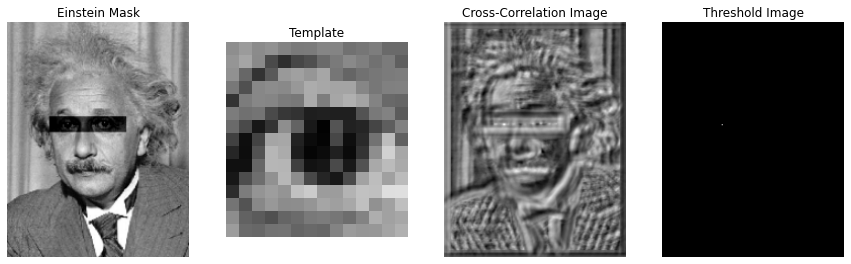

In [ ]:
# solution
einstein_mask_img = plt.imread(drive_path + 'einstein_mask.png')
einstein_mask_gray_img = color.rgb2gray(einstein_mask_img)

cross_corelation_img = feature.match_template(einstein_mask_gray_img, template_gray_img, pad_input=True)
threshold_3_img = create_threshold_image(cross_corelation_img, 0.55)

fig, axs = plt.subplots(1, 4)
fig.set_size_inches(15, 10)

for ax in axs:
    ax.axis('off')

axs[0].imshow(einstein_mask_img)
axs[1].imshow(template_img)
axs[2].imshow(cross_corelation_img, cmap = 'gray')
axs[3].imshow(threshold_3_img, cmap = 'gray')

axs[0].set_title('Einstein Mask')
axs[1].set_title('Template')
axs[2].set_title('Cross-Correlation Image')
axs[3].set_title('Threshold Image')

*   Do you find any differences in results with respect to contrast changes? 
*   Were you able to get the location of the template in all the above experiments? Explain your inferences.

In [ ]:
num_matches_1 = np.sum(threshold_1_img)
num_matches_2 = np.sum(threshold_2_img)
num_matches_3 = np.sum(threshold_3_img)
print(f'Matches with einstein: {num_matches_1}')
print(f'Matches with einstein_br: {num_matches_2}')
print(f'Matches with einstein_mask: {num_matches_3}')

Matches with einstein: 6
Matches with einstein_br: 9
Matches with einstein_mask: 1


**Solution**

Setting the same threshold value in all experiments, and then using different images, lead to different results. This can be observed in the results of the previous cell, where we have printed the number of matches that survived the thresholding

The most obvious difference is in this last image where a black mask with some transparency was applied over the eyes. This resulted in small correlation values in the pixels corresponding to that mask, causing some of the previous matches not to survive the thresholding. In particular, we can see how the few matches we had in the left eye have disappeared completely, and the number of matches we had in the right eye have been reduced to only 1.

Then we can see the results of changing the contrast of the image by making it brighter. We obtain more matches that survive the thresholding than the original image (without contrast change). This is because we have not changed the template, and the template is extracted from the original image.

We can see how normalized cross-correlation is less sensitive to contrast changes than it is the simplest method of the sum of square distances. It is less sensitive to contrast and illumination changes when they are produced overall in the image. However, the method still fails when the changes are only produced locally, as we can see when the black mask is superposed, that we lose a lot of matches.

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

Text(0.5, 1.0, 'Threshold Image')

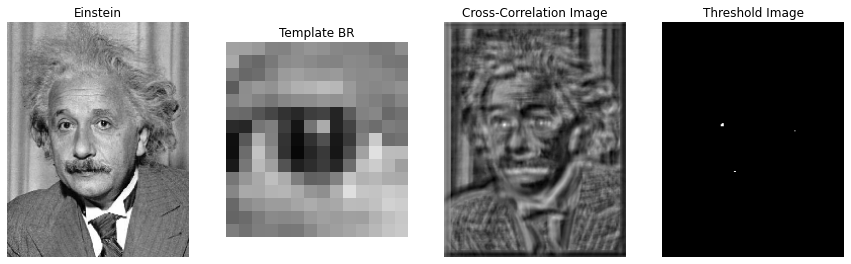

In [ ]:
# solution
template_br_img = plt.imread(drive_path + 'template_br.png')
template_br_gray_img = color.rgb2gray(template_br_img)

cross_corelation_img = feature.match_template(einstein_gray_img, template_br_gray_img, pad_input=True)
threshold_4_img = create_threshold_image(cross_corelation_img, 0.55)

fig, axs = plt.subplots(1, 4)
fig.set_size_inches(15, 10)

for ax in axs:
    ax.axis('off')

axs[0].imshow(einstein_img)
axs[1].imshow(template_br_img)
axs[2].imshow(cross_corelation_img, cmap = 'gray')
axs[3].imshow(threshold_4_img, cmap = 'gray')

axs[0].set_title('Einstein')
axs[1].set_title('Template BR')
axs[2].set_title('Cross-Correlation Image')
axs[3].set_title('Threshold Image')

11


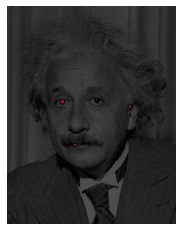

In [ ]:
print(np.sum(threshold_4_img))

plt.imshow(einstein_img)
plt.axis('off')

plt.imshow(threshold_4_img, cmap = matplotlib.colors.ListedColormap(['black', 'magenta', 'red']), alpha=0.7)

**Solution**

Changing the contrast of the template, and using the original image that did not have the contrast changed, lead to more false positives than before, in addition to losing real matches. We have lost the single match in the left eye, we have obtained a similar number of matches in the right eye as when comparing the `einstein_br.png` with `template.png`, Also, we have gained two false positives in the mouth, as well as a false positive in the left ear.

We can see in this case a bigger effect when the template contrast is the one changed than when the contrast of the image is the one changed. The contrast change by making the eye template brighter has supposed losing contrast in the edges defining the superior eyelid. This in turn makes it more difficult to match with an eye in the original image, where the contrast was better.

Also, given that the template was extracted from the right eye, it is normal to find more matches there even though the contrast change. On the other hand, the left eye seems more rounded in the lower eyelid, which it makes more difficult to match in this case. We have observed during all the previous results how the left eye always had fewer matches.

### Exercise #3: Effect of rotation

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

In [ ]:
def plot_images_rotating_template(rotation_angle, axis_objects):
    rotated_template_img = transform.rotate(template_gray_img, rotation_angle)
    cross_corelation_img = feature.match_template(einstein_gray_img, rotated_template_img, pad_input=True)
    threshold_img = create_threshold_image(cross_corelation_img, 0.55)
    
    axis_objects[0].imshow(einstein_img)
    axis_objects[1].imshow(rotated_template_img, cmap = 'gray')
    axis_objects[2].imshow(cross_corelation_img, cmap = 'gray')
    axis_objects[3].imshow(threshold_img, cmap = 'gray')

    axis_objects[0].set_title('Einstein')
    axis_objects[1].set_title(f'Template rotated {rotation_angle}º')
    axis_objects[2].set_title('Cross-Correlation Image')
    axis_objects[3].set_title('Threshold Image')

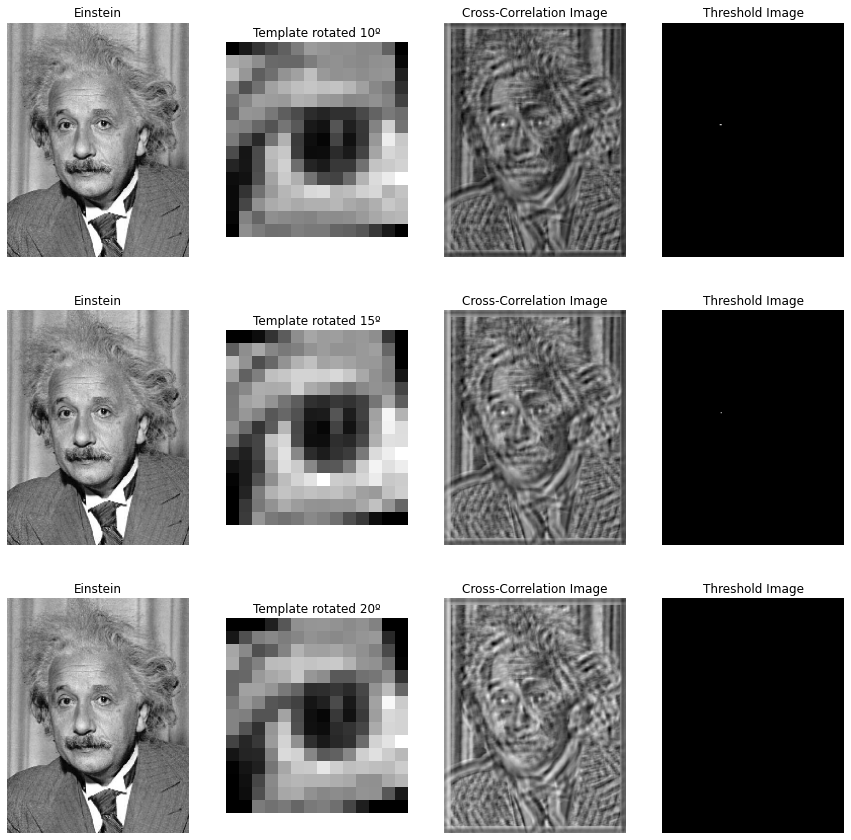

In [ ]:
# solution
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(15, 15)

for ax in axs.flatten():
    ax.axis('off')

plot_images_rotating_template(10, axs[0])
plot_images_rotating_template(15, axs[1])
plot_images_rotating_template(20, axs[2])

*   What do you infer with respect to rotation?

**Solution**

Normalized cross-correlation is not invariant to changes or transformations to the template like for example rotation, that can lead to a different template that will difficultly match with some patch in the original image. The template has a particular shape and pose, and if there is no patch in the image with this same shape and pose, it will be difficult to find a match.

This can be observed in these previous results, as when the template is not that much rotated it still detects some match in the right eye (the eye from where the template is extracted), but with a bigger rotation angle, we see more black pixels in the template, making it more difficult to find a match in the original image. The black pixels correspond to padded pixels added to maintain the square shape. Given that we are not resizing the template (we can do it with the `resize` option in `transform.rotate`), but we are keeping the size, we are only considering a small number of those black pixels, but they suppose enough difference to not generate any possible match with the image.

Below we show how the rotated templates look like, and the resulting shape We can see how we are ge

Template rotated 10º shape (17, 16)
Template rotated 15º shape (18, 17)
Template rotated 20º shape (19, 18)


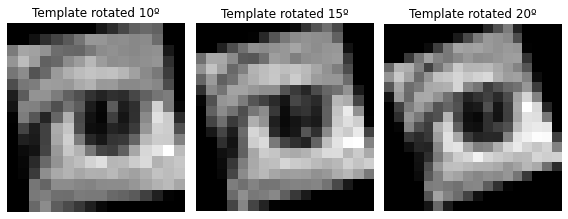

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(8, 5)

for ax in axs:
    ax.axis('off')

rotated_10_img = transform.rotate(template_gray_img, 10, resize=True)
rotated_15_img = transform.rotate(template_gray_img, 15, resize=True)
rotated_20_img = transform.rotate(template_gray_img, 20, resize=True)

axs[0].imshow(rotated_10_img, cmap = 'gray')
axs[1].imshow(rotated_15_img, cmap = 'gray')
axs[2].imshow(rotated_20_img, cmap = 'gray')

axs[0].set_title('Template rotated 10º')
axs[1].set_title('Template rotated 15º')
axs[2].set_title('Template rotated 20º')

fig.tight_layout()

print(f'Template rotated 10º shape {rotated_10_img.shape}')
print(f'Template rotated 15º shape {rotated_15_img.shape}')
print(f'Template rotated 20º shape {rotated_20_img.shape}')

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Read the template ('person_template.png') from the images folder
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib

In [ ]:
def plot_hog(img, ax=None, **kwargs):
    _, hog = feature.hog(img, visualize=True, **kwargs)
    if ax is not None:
        ax.imshow(hog, cmap="gray")
    else:
      plt.imshow(hog, cmap="gray")

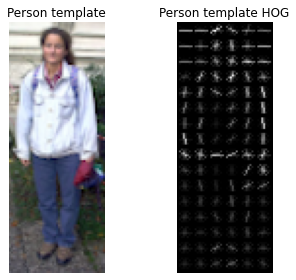

In [ ]:
# solution

person_template = io.imread("/content/drive/MyDrive/CV - Lab/Lab4/images/person_template.bmp")
fd, person_template_hog = feature.hog(person_template, visualize=True, feature_vector=False, multichannel=True)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(5, 4)

for ax in axes:
    ax.axis('off')

axes[0].imshow(person_template)
axes[0].set_title("Person template")

axes[1].imshow(person_template_hog, cmap='gray')
axes[1].set_title("Person template HOG")

fig.tight_layout();


In [ ]:
person_template.shape

(129, 49, 4)

In [ ]:
fd.shape

(14, 4, 3, 3, 9)

*   Explain the algorithm behind HOG



**Solution**

For the sake of simplicity, we will considered fixed some parameters, such as the size of the cells or the number of orientation bins. 

Let's assume that we are dealing with a $64 \times 128$ image.

1. The gradient of the image is computed. However, we are not interested only in the magnitude but also in the orientation of the gradient
$$
\theta = tan^{-1}\Big(\frac{\partial f}{\partial y}\Big/\frac{\partial f}{\partial x}\Big)
$$
given that it is invariant to luminance changes.
2. Divide the gradient image into **cells** of pixels (the size used in the original paper is $8\times8$ pixels per cell). Therefore, in our case, we will have $8 \times 16$ cells.
3. Compute the histogram for each cell. To do that,  the range of possible rotations $\theta$ is divided into $n$ bins ($9$ is the default), so we can compute the histogram of the orientations of each cell based on those bins. It must be noted that the contribution of every pixel in the cell to the final histogram is weighted by the intensity of the gradient in that pixel. So in total, in this case, there are $8\times 16 \times 9$ bins ($9$ for each cell).
4. Once the histograms have been computed, they are aggregated in **blocks** of $2\times 2$ cells (according to the original paper). It is important to highlight that there is an overlap of $50\%$ between $2$ adjacent blocks.  So there are $7\times15$ blocks with $4\times9=36$ bins each one.
5. Given that the gradient magnitudes may vary over a wide range because of local changes of illumination and foreground-background contrast, it is necessary to normalize the contrast locally. To do that, the histogram of every block is normalized via $L_2$ normalization, that is, dividing by
$$
\sqrt{\vert\vert v \vert\vert_2^2 + \varepsilon^2},
$$ 
where $\varepsilon$ is a regularization parameter to avoid zero division error.
6. The normalized histogram of all block of cells are concatenated to form the final feature vector. This vector will contain $7\times15\times4\times9=3780$ features.



*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

In the original [paper](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf), the authors study the application of gamma correction as a preprocesing step to adjust illuminance or color intensities. This is a global correction process, and it is a common preprocessing technique for some methods. This is probably because there is a step in which each block is normalized locally.

Therefore, the aforementioned  gamma coretion would not be strictly necessary to overcome illuminance variance. Indeed, the default version of the implementation of the `hog()` function of `skimage` does not apply this gamma correction step.

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

`orientations` refer to the number of orientation bins used when applying HOG. In other words, it represents the number of possible different orientations that can be represented in each cell.

On the other hand, `pixels_per_cell` is a tuple representing the size of the cell that will be used to compute each one of those histograms.

*   Change the value of orientation (try at least 3 different values) and compare the hog_image using matplotlib subplot.

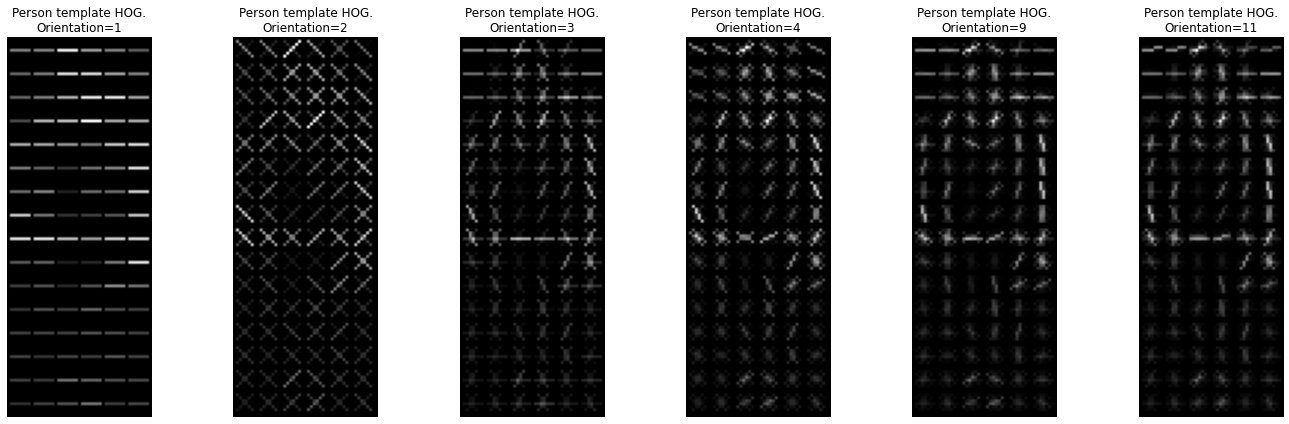

In [ ]:
# solution

orientation_values = [1, 2, 3, 4, 9, 11]

fig, axes = plt.subplots(1, len(orientation_values))
fig.set_size_inches(20, 6)

for ax in axes:
    ax.axis('off')

fig.tight_layout();

for i in range(len(orientation_values)):
    orientations = orientation_values[i]
    plot_hog(person_template, axes[i], orientations=orientations, multichannel=True)
    axes[i].set_title(f"Person template HOG.\nOrientation={orientations}")

fig.tight_layout();

In the images displayed above we can see how the parameter `orientations` affect the final result. 

In the extreme case of `orientations=1`, there is only one possible final orientation for the gradient (horizontal). If we use 2 instead, now the only possibilities are the two diagonals. As we increase the value, the figure of the pedestrian can be modeled more accuratelly. However, the differences are less noticeable at the end. 

Our conclusions are in line with those of [this paper](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf), where the authors literally say "increasing the number of orientation bins improves performance significantly up to about 9 bins, but makes little difference beyond this".

Moreover, increasing the number of bins also increases the size of the final feature vector that we have to deal with. So it seems reasonable to set the number of bins to 9, as it has been tested to give good results in pedestrian detection.

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**

In our particular case, the shape of the feature descriptor (as shown above) is `(14, 4, 3, 3, 9)`.

According to the function's documentation, the returned array (if `feature_vector=False`) of size `(n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient)`.

The two first elements correspond to the number of blocks in row and column dimension, respectively. Let's try to compute them. At first, we need to take into account that there is an overlap between different blocks. Given that the image has a shape of $129\times 49$ and that every block has $3\times 3$ cells of $8\times 8$ pixels each, we have:

$$
floor\Big(\frac{129}{8}\Big) - (3-1) = 16 - 2 = 14
$$
$$
floor\Big(\frac{49}{8}\Big) - (3-1) = 6 -2 = 4
$$



The third and the fourth dimensions refer to the size of each cell in pixels ($3\times3$ in this case). The names given by the documentation might lead to confusion, given that there are variables in the function with that name but whose value is not that. 

The last dimension is simply the number of orientation bins (9 by default).


### Exercise #2: Pedestrian detection
*   For the 'person_template.png', try different values for the parameters and get the optimal value.
*   The hog descriptor obtained would be used in detecting pedestrians.
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

As we have seen previously, it is important that the `orientations` parameter is high enough to ensure that important details are not lost. Therefore, and given that there seems to be no improvement beyond 9 bins, we will stick to the default value (9) for this parameter.

Now, we are showing examples of how different parameters affect the obtained hog_image.

At first, we will try to change the size of the cells:

In [ ]:
def plot_image_and_hog_with_configurations(image, image_title, configurations):
    fig, axes = plt.subplots(2, len(configurations))

    fig.set_size_inches(10, 10)

    for ax in axes.flatten():
        ax.axis("off")


    for i in range(len(configurations)):
        axes[0, i].imshow(image)
        axes[0, i].set_title(image_title)
        plot_hog(person_template, ax=axes[1,i], **configurations[i])
        axes[1, i].set_title(f"Configuration {i}")

    fig.tight_layout();

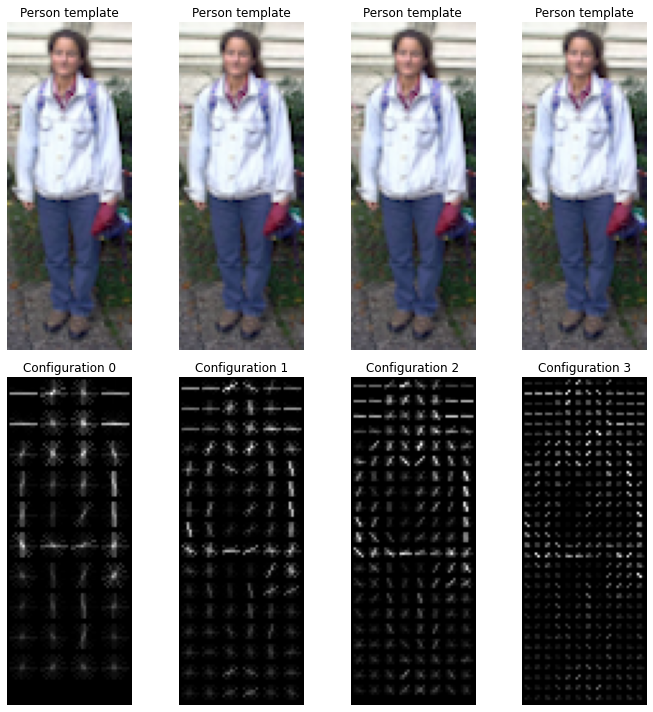

In [ ]:
# solution
configurations_cell_size = [
                  {
                      "pixels_per_cell": (12,12),
                      "multichannel": True
                  },
                  {
                      "pixels_per_cell": (8,8),
                      "multichannel": True
                  },
                  {
                      "pixels_per_cell": (6,6),
                      "multichannel": True
                  },
                  {
                      "pixels_per_cell": (4,4),
                      "multichannel": True
                  }
]
plot_image_and_hog_with_configurations(person_template, "Person template", configurations_cell_size)

As we could expect, the details that are captured by the HOG decreases when the size of cells increases (as we have less cells and thus, less "resolution"). 

With a size of $12\times 12$ we are losing a lot of details. However, it is still possible to distinguish the head, the trunk, the arms and the legs of the girl. However, such a simple representation could match a lot of patterns wich do not correspond to pedestrian.

With the default size of $8\times8$ we can appreciate more details that in the previous one, but it also introduces some noise, specially in the middle part of the image.

When we further reduce the number size of the cells, it is harder and harder to recognise the sillouthe of a person, and the results seem mainly noise. Moreover, such a detailed representation would make it difficult to generalise to other pedestrians, and we could "overfit" to this particular image.

So, the simpler the representation, the more false positives we will have. The more complex the representation, the more false negatives.

We think that the default configuration of $8\times8$ is a good trade-off between both extremes, so we will use it.

Another attribute that we have to consider is `transform_sqrt`, whose default is `False`. If `True`, the function normalizes globally the image before processing it by using gamma compression (via squared root). As we have previously mentioned, the authors of the paper consider that the influence of this step is relatively small because we apply the block normalization step. Therfore, we will leave it as `False`


Regarding the rest of the arguments, (`cells_per_block`, `block_norm`), their effect on the computed HOG cannot be easily cheked visually in order to understand how they affect in ths particular case. Besides, we consider that there are not general "optimal values", and results would depend on the specific task and samples. Therefore, we will use blocks of $2\times2$ cells (like in the already mentioned paper) and we will leave `block_norm` with its default value.

Moreover, we should note that are using in all the cases `multichannel=True` so that the function `hog()` treat properly the different channels. Particularly, the function would compute the gradients per channel and take for every pixel the gradient of the channel with the greatest magnitude. This is important because the authors found that losing color information leads to a worsening of the results.

In general, it is very hard to select the best configuration without an specific task. One option would be selecting the parameters in terms of the results of the next exercise, but due to the order of the exercises we think that this is no the correct approach.


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot along with the original image.


It is important to note that the dot product is not usually used a a distance metric but as a similarity metric. This can be easily seen with the following formula:
$$
cos(\theta) = \frac{a\cdot b}{\vert\vert a\vert\vert\vert\vert b \vert\vert}
$$
So the greater the cosine, the greater the dot product. And the cosine is maximum, $1$, when 2 vectors have the same direction, $0$ when 2 vectors are orthogonal and $-1$ when they have oposite direction.

Therefore, we will not try to minimze but maximize the dot product. Moreover, it is common to normalize the dot product as seen in the previous formula in order to avoid the magnitude of the vector affecting the results. However, as it is not mentioned in the exercise, we will include both metrics (dot and cosine) to see if they perform differently.

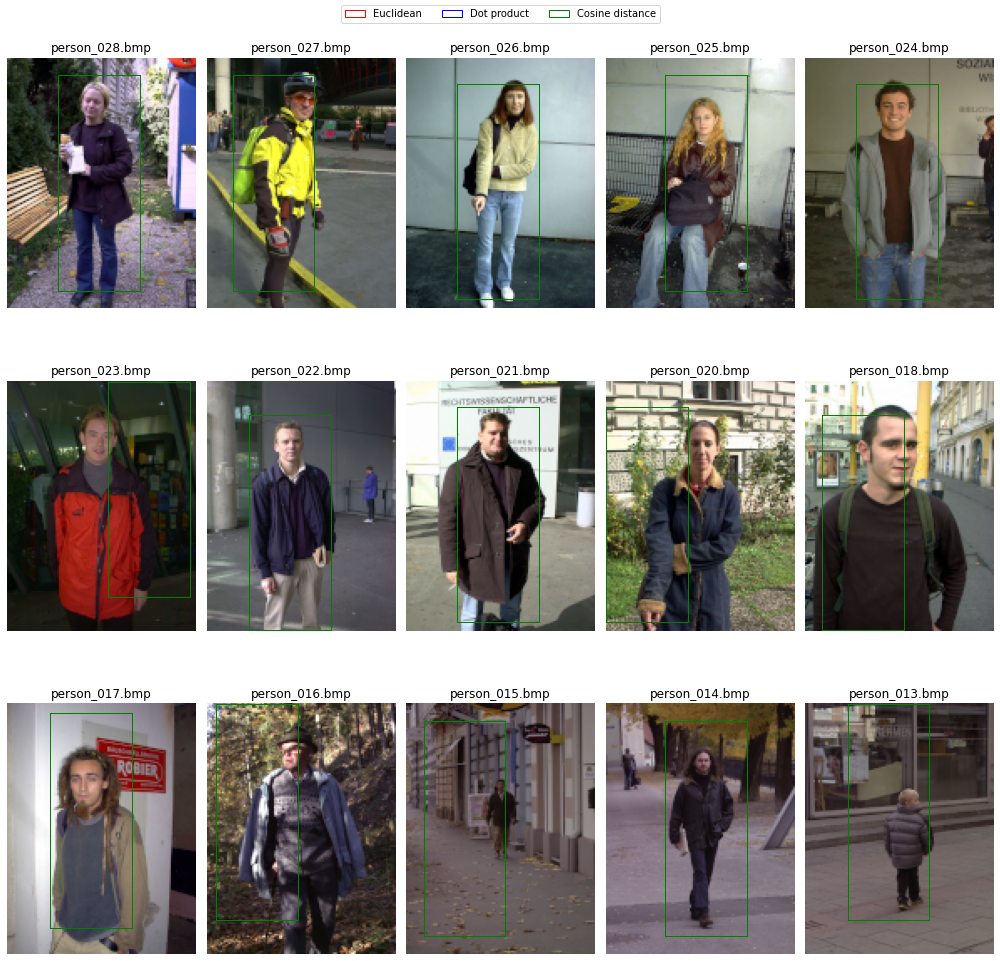

In [ ]:
# solution
import matplotlib.pyplot as plt
import matplotlib.patches as patches

configuration = {
          "pixels_per_cell": (8,8),
          "multichannel": True,
          "cells_per_block": (2,2),
          "transform_sqrt": False,
          "orientations": 9
}

def sliding_window_hog(img, fv, window_size, step_size=5, distance="euclidean", return_hog=False):
    ih, iw = img.shape[:2]
    wh, ww = window_size
    min_d = np.inf
    best = None
    best_visualization = None
    for i1 in range(0,ih-wh,5):
      for i2 in range(0, iw-ww, 5):
        crop = img[i1:i1+wh, i2: i2+ww]
        feature_vector, visualization = feature.hog(crop, visualize=True, **configuration)
        if distance=="euclidean":
          d = np.sqrt(np.sum((feature_vector-fv)**2))
        elif distance=="dot":
          d = -np.dot(fv, feature_vector)
        elif distance=="cosine":
          d = 1-np.dot(fv, feature_vector)/(np.linalg.norm(fv)*np.linalg.norm(feature_vector))
        if d<min_d:
          min_d=d
          best = (i1, i2)
          best_visualization = visualization
    if return_hog:
      return best, min_d, best_visualization
    return best, min_d

fv = feature.hog(person_template, feature_vector=True,  **configuration)


# Dictionary to save the distances
distances = {}

ncols = 5
image_files = os.listdir("/content/drive/MyDrive/CV - Lab/Lab4/images/pedestrians")
nrows = int(np.ceil(len(image_files)/ncols))

fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(14,14)

for ax in axes.flatten():
  ax.axis("off")

for i, file in enumerate(image_files):
    #print(file)
    img = io.imread(os.path.join("/content/drive/MyDrive/CV - Lab/Lab4/images/pedestrians", file))
    best_euc, dist_euc = sliding_window_hog(img, fv, window_size=person_template.shape[:2])
    best_dot, dist_dot = sliding_window_hog(img, fv, window_size=person_template.shape[:2], distance="dot")
    best_cos, dist_cos = sliding_window_hog(img, fv, window_size=person_template.shape[:2], distance="cosine")

    distances[file]={
        "Euclidean": dist_euc,
        "Dot": dist_dot,
        "Cosine": dist_cos
    }

    ax = axes[i//ncols, i%ncols]

    # Display the image
    ax.imshow(img)

    # Create a Rectangle patch
    rect_euc = patches.Rectangle(best_euc[::-1], person_template.shape[1], person_template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
    rect_dot = patches.Rectangle(best_dot[::-1], person_template.shape[1], person_template.shape[0], linewidth=1, edgecolor='b', facecolor='none')
    rect_cos = patches.Rectangle(best_cos[::-1], person_template.shape[1], person_template.shape[0], linewidth=1, edgecolor='g', facecolor='none')



    # Add the patch to the Axes
    ax.add_patch(rect_euc)
    ax.add_patch(rect_dot)
    ax.add_patch(rect_cos)

    ax.set_title(os.path.basename(file))

fig.legend( [rect_euc, rect_dot, rect_cos], ["Euclidean", "Dot product", "Cosine distance"],loc = 'upper center', ncol=ncols)
fig.tight_layout();

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

As we can see, all the metrics (including cosine) lead to the same result. Therfeore, we can make general comments about the performance.

- person_023.bmp: The detection is failing here because the image only contains half of the body of the pedestrian. Therefore, this is penalising the feature matching because for example, the legs, are visible. Moreover, the difference between the arms and the background seems not too sharp, so it seems unlikely that the same gradient patterns are found.
- person_020.bmp: Here we have a similar case in the sense that the legs are no shown in the image. Therefore, it is no possible to "match" that part of the body. Additionally, the girl has the arms in a different position than in the template. This would definitely affect the HOG computed in the arms and the trunk.
- person_018.bmp: we don't know if we should consider this a failure, given that even the person is inside the box, in this image that would be the case for any box because of the scale of the pedestrian. Moreover, the box is not centered in the pedestrian's body. Therefore, we could say that the method fails here because of the change of scale of the person, because we can only see the upper part of the body, as in the previous cases.
- person_016.bmp: in this case both the scale and the pose seem right to perform a good detection. However, it is not able to find the person, probably because the background is introducing a lot of noise. 
- person_015.bmp and person_013.bmp. In this case, it is not clear if it is a failure. The pedestrians are inside the boxes, but given the huge difference in scale (pedestrians are much smaller than the box) and the fact that the box is not centered with respect to the pedestrians, we believe that the algorithm has succeed by pure chance. This is especially obvious in the case of person_015.bmp, as part of the body is outside the box. Therefore we will consider definitely the image as a failure.

Therefore, depending on what we consider a failure, we could be talking about any number in the range of 4 to 6. 

Given that we don't have a clear explaination of why the algorithm is failing in person_016.bmp, we are going to plot the HOG of the selected area to see if it is really visually similar to the HOG we are using as a template.

(-0.5, 48.5, 128.5, -0.5)

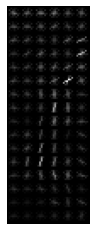

In [ ]:
img = io.imread(os.path.join("/content/drive/MyDrive/CV - Lab/Lab4/images/pedestrians", "person_016.bmp"))
_,_, best_hog = sliding_window_hog(img, fv, window_size=person_template.shape[:2], return_hog=True)
plt.imshow(best_hog, cmap="gray")
plt.axis("off")

This is not very similar to the HOG we are using to detect pedestrians. However, it contains some common elements (what could be the legs). This have led to a false positive.

*   What is the failure rate for the dot product and what is the failure rate for the euclidean distance?

**Solution**

As the results are the same, the failure rate is also identical. We have already mentioned that there are some cases that are not clear failures or hits (it depends on the exact definition of hit). Therefore, the failure rate would be between $0.27$ and $0.4$. 

As wee can see, there is a great difference in the metric depending on what we understand by success of the algorithm.

*   What is the difference between using dot product and euclidean distance?

**Solution**

In our case, we have shown that the results are identical in all the cases, so there is no difference in that regard.

However, those metrics are conceptually different. As we have already mentioned the dot product and the cosine are a measure of how similar are the orientations of two vectors. When normalized, it is an indicative of how similar are the orientations of  two vectos based on a value in the range -1 to 1. 

On the other hand, the euclidean distance measures the distance in a "straight line" between 2 points.

*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

Both template matching and HOGs can be used to detect certain components in an image (e.g. detect pedestrians).

Template matching computes a normalized cross-correlation at pixel level, computing it for each pixel where the match with a template of that size can be found. In the case of HOGs, we compare the resulting HOGs of a patch of the image and the template.
Therefore, we need to compute the HOGs for both images, whereas in template matching we directly use pixel intensities.

Using pixel intensities, even though we are standarizing them, makes the template matching more sensible to intesity changes, as we have seen with the `einstein_mask.png` image. Also, it is not scale invariant, as it needs to compute the cross-correlation using each pixel in the patch.

On the other hand, HOG, by mainly using gradient directions, it is more robust to intensity changes. Also, in the case of pedestrian detection we have seen how it is more robust to the people having different poses, clothes colors, as well as background colors and illumination. Besides, thank to being an histogram itself, it is more robust to scale changes, permitting the detection for example of pedestrians of different sizes.

None of them, however, are robust to other spatial transformations like rotation.


---

## **End of P2_1: Template Matching and HOG**
Deadline for P2_1 submission in CampusVirtual is: **Monday, the 1st of November, 2021**
